In [44]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from imblearn.over_sampling import SMOTE
import xgboost

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('emp_data.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
display(data.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

## Identifying categorical and numerical

In [6]:
def refactor_categorical(df,col):
    unique_vals = set(list(df[col]))
    if len(unique_vals) < 10:
        unique_vals_dict = {}
        new_val = 0
        for val in unique_vals:
            unique_vals_dict[val] = new_val
            new_val += 1
        print(col,unique_vals_dict)
        df[col] = df[col].apply(lambda x: unique_vals_dict[x])
    return

In [7]:
for col in data.columns:
    if(col != "Attrition"):
        refactor_categorical(data,col)

BusinessTravel {'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}
Department {'Research & Development': 0, 'Human Resources': 1, 'Sales': 2}
Education {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
EducationField {'Life Sciences': 0, 'Technical Degree': 1, 'Medical': 2, 'Other': 3, 'Marketing': 4, 'Human Resources': 5}
EmployeeCount {1: 0}
EnvironmentSatisfaction {1: 0, 2: 1, 3: 2, 4: 3}
Gender {'Male': 0, 'Female': 1}
JobInvolvement {1: 0, 2: 1, 3: 2, 4: 3}
JobLevel {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
JobRole {'Research Director': 0, 'Manager': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Sales Representative': 4, 'Research Scientist': 5, 'Healthcare Representative': 6, 'Human Resources': 7, 'Sales Executive': 8}
JobSatisfaction {1: 0, 2: 1, 3: 2, 4: 3}
MaritalStatus {'Married': 0, 'Single': 1, 'Divorced': 2}
Over18 {'Y': 0}
OverTime {'Yes': 0, 'No': 1}
PerformanceRating {3: 0, 4: 1}
RelationshipSatisfaction {1: 0, 2: 1, 3: 2, 4: 3}
StandardHours {80: 0}
StockOptionLevel {0: 0, 

## Exploratory data analysis

In [8]:
income_density = ggplot(data, aes(x='MonthlyIncome',color='Attrition')) + \
    geom_density(alpha=0.7) + \
    scale_color_manual(values = ["coral","blue"])
'''income_density.make()
fig1 = plt.gcf()
ax1 = plt.gca()'''

wlb_density = ggplot(data, aes(x='WorkLifeBalance',color='Attrition')) + \
    geom_density(alpha=0.7) + \
    scale_color_manual(values = ["coral","blue"])
'''wlb_density.make()
fig2 = plt.gcf()
ax2 = plt.gca()'''

hike_density = ggplot(data, aes(x='PercentSalaryHike',color='Attrition')) + \
    geom_density(alpha=0.7) + \
    scale_color_manual(values = ["coral","blue"])
'''hike_density.make()
fig3 = plt.gcf()
ax3 = plt.gca()'''

rstatus_density = ggplot(data, aes(x='MaritalStatus',color='Attrition')) + \
    geom_density(alpha=0.7) + \
    scale_color_manual(values = ["coral","blue"])
'''rstatus_density.make()
fig4 = plt.gcf()
ax4 = plt.gca()'''

'rstatus_density.make()\nfig4 = plt.gcf()\nax4 = plt.gca()'

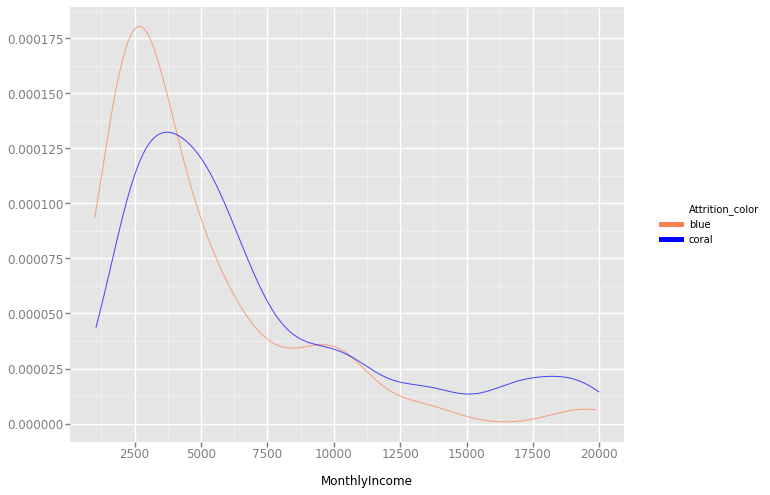

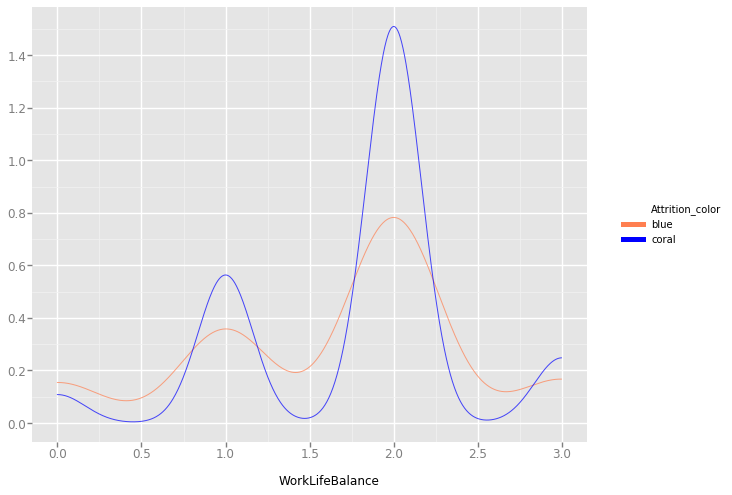

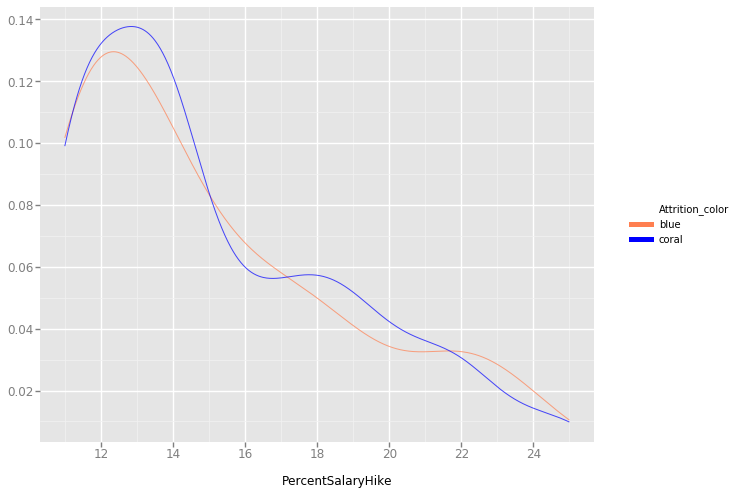

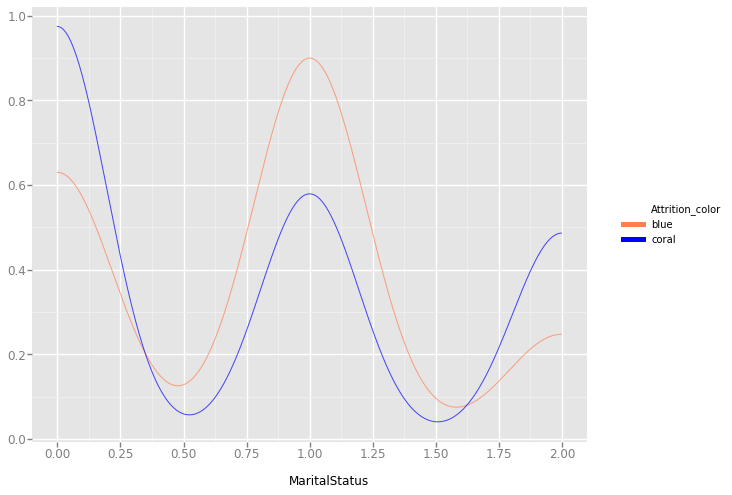

In [20]:
# Distribution plots

income_density.show()
wlb_density.show()
hike_density.show()
rstatus_density.show()

In [19]:
cols = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
corr_data = [
    go.Heatmap(
        z= data[cols].astype(float).corr().values,
        x=data[cols].columns.values,
        y=data[cols].columns.values,
        colorscale='Viridis',
        reversescale = False,
        opacity = 1.0
        
    )
]
layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
    
)


fig = go.Figure(data=corr_data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

## Random Forest Analysis

In [16]:
## First check for class imbalance

target = data["Attrition"]
indexbool_no = data["Attrition"].apply(lambda x: (x == "No"))
indexbool_yes = data["Attrition"].apply(lambda x: (x == "Yes"))
target_no = data["Attrition"][indexbool_no]
target_yes = data["Attrition"][indexbool_yes]
class_imbalance = [go.Bar(x = data["Attrition"].value_counts().index.values,
                        y = data["Attrition"].value_counts().values)]
py.iplot(class_imbalance)

In [27]:
target_var = pd.DataFrame(data["Attrition"])
train_features = data.columns.difference(["Attrition"])
train_var = data[train_features]
train, test, target_train, target_val = train_test_split(train_var,target_var, train_size=0.8)

#### Tackling class-imbalance
This is done to tackle class imbalance. This technique is called Synthetic minority over-sampling. 
In this technique there is no loss of information. Can be used if number of classes are not high-dimensional
(our case just 2). There are more here:
https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/

In [28]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(train,target_train)

In [31]:
# setting param
seed = 0
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

# train model
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)
# On test data
rf_predictions = rf.predict(test)
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*80)
print(classification_report(target_val, rf_predictions))

Accuracy score: 0.826530612244898
              precision    recall  f1-score   support

          No       0.90      0.89      0.90       247
         Yes       0.46      0.49      0.47        47

   micro avg       0.83      0.83      0.83       294
   macro avg       0.68      0.69      0.69       294
weighted avg       0.83      0.83      0.83       294



In [42]:
trace = go.Scatter(
    y = rf.feature_importances_,
    x = train_var.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 11,
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = train_var.columns.values
)
graph_data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=graph_data, layout=layout)
py.iplot(fig,filename='scatter')

## Gradient Boosting analysis

In [47]:
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(test)
print(accuracy_score(target_val, gb_predictions))
print(classification_report(target_val, gb_predictions))

0.8877551020408163
              precision    recall  f1-score   support

          No       0.91      0.97      0.94       247
         Yes       0.73      0.47      0.57        47

   micro avg       0.89      0.89      0.89       294
   macro avg       0.82      0.72      0.75       294
weighted avg       0.88      0.89      0.88       294



In [50]:
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = train_var.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 11,
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = train_var.columns.values
)
graph_data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=graph_data, layout=layout)
py.iplot(fig,filename='scatter')